### Abstract

This project dives into machine learning with a focus on recognizing handwritten characters from a version of the MNIST dataset. We start by preparing our data, making it ready for analysis, and then use TensorFlow to build a model that can identify these characters. Our steps include organizing the data, creating a neural network model, and finally, testing its ability to classify characters accurately. By evaluating our model's performance, we learn about its strengths and how we can make it even better. This work shows how neural networks can be powerful tools for recognizing images and provides a practical guide for anyone interested in starting their machine learning journey.

### Objective

Our goal is to create a neural network that can correctly recognize and classify handwritten characters from a dataset similar to MNIST. In doing this, we aim to:
- Learn the process of preparing data for machine learning.
- Build and understand a convolutional neural network using TensorFlow and Keras.
- Assess how well our model works and identify ways to improve it.
- Provide a step-by-step example for beginners interested in machine learning, especially in image recognition.

#### Lets now understand the data and pre-process it.
Before we begin, we'll need to import several key Python libraries that will help us manipulate data, visualize patterns, and construct our machine learning model. These libraries include pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for visualization, and keras from TensorFlow for building our neural network.


In [2]:
!pip install tensorflow

#Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement keras<2.16,>=2.15.0 (from tensorflow) (from versions: none)
ERROR: No matching distribution found for keras<2.16,>=2.15.0


2024-04-10 00:57:19.950538: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 00:57:19.950717: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 00:57:20.150692: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
data = pd.read_csv("/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv")

Understanding our data is crucial before we dive into modeling. We'll explore the dataset by examining its shape, checking for missing values, and visualizing the distribution of characters. This exploration will give us insights into the dataset's characteristics and help us make informed decisions throughout our project.

In [6]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,274093.0,274093.0,274093.0,274093.0,274093.0,274093.0,274093.000000,274093.000000,274093.000000,274093.000000,...,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.000011,0.001043,0.001518,...,0.002638,0.001562,0.001131,0.000894,0.000489,0.000317,0.000204,0.000033,0.000033,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.001910,0.004271,0.475743,0.494410,...,0.320080,0.179093,0.150590,0.189578,0.083345,0.067396,0.053345,0.012813,0.012813,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.000000,248.000000,245.000000,...,103.000000,59.000000,41.000000,88.000000,21.000000,20.000000,19.000000,6.000000,6.000000,0.0


In [9]:
data.shape

(274093, 786)

The shape of the dataset is (274093, 786), indicating there are 274,093 samples and 786 features. This might include target variables or additional metadata along with the 784 features discussed earlier.


In [10]:
data['labels'].unique()

array(['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=',
       'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y',
       'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X',
       '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0',
       '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S',
       'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~',
       ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q',
       'L', '!', '\\'], dtype=object)

In [11]:
data['labels'].nunique()

94

This indicates the total number of unique labels or classes in the dataset, which is 94. This aligns with the diverse set of characters, digits, and symbols identified earlier, confirming a multi-class classification problem.


## Preprocessing the Data
To ensure our model can learn effectively, we'll preprocess our data. This involves normalizing the image pixel values, reshaping the images for our neural network, and encoding our labels. Preparing our data meticulously will lay a solid foundation for our model's performance.

In [12]:
# Dropping columns that are redundant like names and labels from the training frames and keeping only pixel values
X = data.drop(columns={'names','labels'}, axis = 1)
y = data[['labels']]

We have dropped names coloumn as it seems to be insignificant and the column label was being split for train & test.

In [13]:
labels = data['labels'].unique()
values = [num for num in range(len(data['labels'].unique()))]
dict_value_label = dict(zip(values,labels))
dict_label_value = dict(zip(labels,values))

This cell creates two dictionaries from the unique labels found in `data['labels']`. The first dictionary, `dict_value_label`, maps integers (starting from 0) to the unique labels in the dataset. This could be useful for numerical indexing of labels, such as converting numerical predictions back to their original label form.

The second dictionary, `dict_label_value`, performs the reverse mapping, associating each unique label with its corresponding integer value. This is particularly useful for encoding categorical labels into a numerical format that can be used by machine learning models for training and prediction.

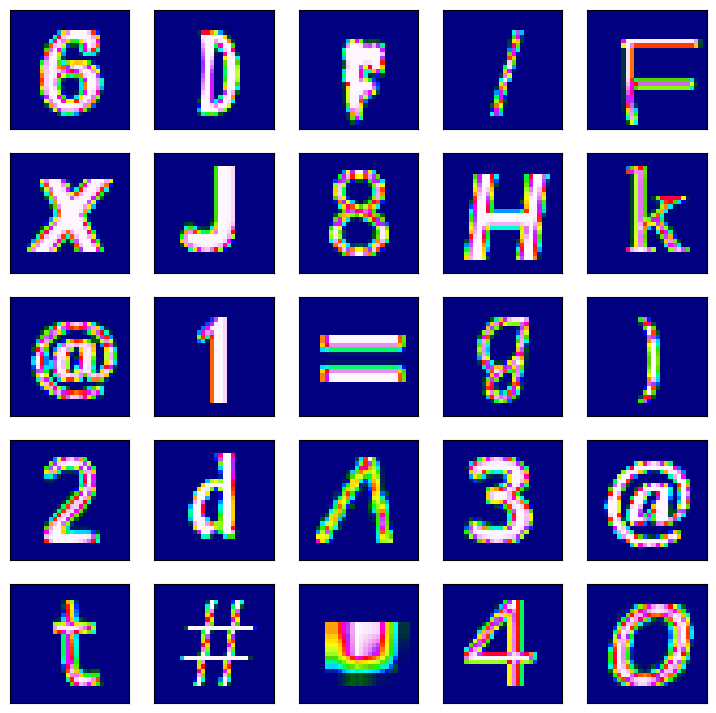

In [14]:
# data exploration and visualization aimed at examining the integrity and content of a dataset named X.
# dealing with image data, related to handwritten digits, given the shape and the reshaping operation performed.

# reshape the data in the X variable into a 3D array where each entry corresponds to a 28x28 pixel image.
X_images = X.values.reshape(-1,28,28) # -1 in the reshape operation infers the size of the first dimension, while 28 and 28 are the dimensions of the image.

# create a 5x5 grid of subplots for visualizing the images
fig, axs = plt.subplots(5, 5, figsize=(9, 9))

#  loop through the first 25 images in the reshaped dataset (X_images) and plot them on the subplots.
for i in range(25):
    r = i // 5
    c = i % 5
    axs[r][c].set_xticks([]) # set_xticks([]) and set_yticks([]) commands remove the ticks on the x and y axes, and imshow displays the image.
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i], cmap = 'gist_ncar') # Changing the cmap parameter here

# display the grid of images
plt.show()

1. **Reshaping Data:** The dataset in `X` is reshaped into a 3D array where each entry corresponds to a 28x28 pixel image. This operation transforms the data from a flat array into a format that represents the original image dimensions, making it possible to visualize and process them as images. The `-1` in the reshape operation allows numpy to automatically infer the number of images based on the size of the dataset and the specified image dimensions (28x28).

2. **Creating a Grid of Subplots:** A 5x5 grid of subplots is created using matplotlib, setting the stage for visualizing the first 25 images in the dataset. The figsize parameter of (9, 9) specifies the size of the entire grid in inches, providing a spacious layout for clear visualization.

3. **Visualizing Images:** The code loops through the first 25 images in the reshaped dataset (`X_images`) and plots them on the corresponding subplot in the grid. Each subplot's axis ticks are removed to focus on the image content. The `imshow` function displays each image with a colormap (`cmap`) of `'gist_ncar'`, which applies a specific color map to the visualization, enhancing the visual distinction of the digit features.

4. **Displaying the Grid:** Finally, `plt.show()` is called to display the grid of images. This visual representation is crucial for understanding the dataset's composition, including the variation in handwriting styles and the clarity of the digit images.

In [15]:
# import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Spliting training set using 80% of data and test set using 20% of data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # ensures reproducibility by fixing the random seed

In [16]:
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train = enc.fit_transform(y_train.values.reshape(-1,1))
y_test = enc.fit_transform(y_test.values.reshape(-1,1))
y_train,y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

 The `fit_transform` method is used on both `y_train` and `y_test`, after reshaping these arrays to a 2D array (as required by `OneHotEncoder`). Reshaping with `-1` in one dimension automatically infers its size. This method learns the unique labels present in the training data and transforms both the training and testing sets accordingly. A value of 1 indicates the sample belongs to the class represented by that column, with all other columns set to 0.


In [17]:
X_train.shape, X_test.shape

((219274, 784), (54819, 784))

In [18]:
y_train.shape, y_test.shape

((219274, 94), (54819, 94))

In [19]:
from sklearn.preprocessing import LabelBinarizer
# Using LabelBinarizer to map characters to numbers

lab = LabelBinarizer()
y_train_final = lab.fit_transform(y_train)
y_test_final = lab.transform(y_test)
print('Train labels dimension:');
print(y_train.shape)
print('Test labels dimension:');
print(y_test.shape)

Train labels dimension:

(219274, 94)

Test labels dimension:

(54819, 94)


 `LabelBinarizer` approach transforms the dataset's categorical labels into a binary matrix format. This transformation is crucial for multiclass classification tasks, as it allows the model to efficiently differentiate among the numerous classes in the TMNIST dataset.

In [20]:
X_train = X_train.values.reshape(X_train.shape[0],28,28,1)
X_test = X_test.values.reshape(X_test.shape[0],28,28,1)

In [21]:
# Normalizing the Dataset for the Neural Network
X_train, X_test = X_train.astype('float32') / 255., X_test.astype('float32') / 255.

The training and testing sets, `X_train` and `X_test`, are normalized by converting their datatype to `float32` and then dividing by 255. This process scales the pixel values of the images from a range of 0-255 to a range of 0-1.

In [22]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (219274, 28, 28, 1)

X_test shape: (54819, 28, 28, 1)


## Building the Model
With our data prepped, it's time to build our neural network. We'll design a Convolutional Neural Network (CNN) that is well-suited for image classification tasks. Our model will consist of convolutional layers, max pooling, and dropout layers to learn the intricate patterns in our dataset.


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# import Adam optimizer for training neural networks
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score # common metric for classification accuracy

In [24]:
model = Sequential()

# building convolutional layer 1
model.add(Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25))

# building convolutional layer 2
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25))

# building convolutional layer 3
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

# fully connected layer 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

# fully connected layer 2
no_of_classes=data['labels'].nunique()
model.add(Dense(no_of_classes, activation='softmax'))

The model is structured as a sequential Convolutional Neural Network (CNN), optimized for classifying images within the TMNIST dataset

- **Convolutional Layers:** The model starts with convolutional layers, which are essential for image classification tasks. These layers apply filters to the input images to extract features like edges, shapes, and textures. The use of different kernel sizes and depths (64 filters of 5x5 for the first layer, followed by 32 filters of 3x3 for the second and third layers) allows the network to capture a wide range of features from low to high level.

- **Pooling Layers:** Each convolutional layer is followed by a max-pooling layer, which reduces the spatial dimensions of the feature maps. This downsampling helps to decrease the computational cost and controls overfitting by extracting the most prominent features.

- **Dropout Layers:** Dropout layers are added after each pooling operation and after the first dense layer to prevent overfitting. By randomly setting a fraction of input units to 0 at each update during training, dropout forces the network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.

- **Flatten Layer:** The Flatten layer converts the 2D feature maps into a 1D feature vector, making it possible to connect the convolutional layers to fully connected layers.

- **Fully Connected Layers:** After flattening the feature maps, the model includes fully connected layers (one with 256 neurons and another with a number of neurons equal to the number of unique classes in the dataset) to perform classification. The dense layer with 256 neurons serves to interpret the features extracted by the convolutional and pooling layers, while the final dense layer with softmax activation distributes the probabilities across all unique classes in the dataset, facilitating multi-class classification.

## Compiling the Model
After constructing our model, we need to compile it. This step involves specifying the loss function, optimizer, and metrics we'll use to train our model. Choosing the right optimizer and loss function is key to effective learning.


In [25]:
# Compile the model with specified optimizer and loss function

# Use Adam optimizer with default parameters
optimizer  = Adam(learning_rate=0.0005)
callback = EarlyStopping(monitor='loss', patience=5)

# Use categorical cross-entropy as the loss function
loss = 'categorical_crossentropy'
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

The model is compiled with the Adam optimizer and categorical cross-entropy loss, crucial for training efficiency and accuracy in the multi-class classification of the TMNIST dataset. An EarlyStopping callback is used to prevent overfitting by halting training if the loss doesn't improve after five epochs. This setup optimizes the model's learning process, aiming for high accuracy in classifying the diverse range of handwritten characters and symbols.


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 94)             │        24,158 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,862 (722.12 KB)

 Trainable params: 184,862 (722.12 KB)

 Non-trainable params: 0 (0.00 B)

The model summary outlines the architecture of a convolutional neural network designed for classifying the TMNIST dataset. 

- **Convolutional Layers:** Three convolutional layers with varying depths capture different features from the input images. The first layer uses 64 filters, while the second and third layers use 32 filters each.

- **Pooling and Dropout:** Each convolutional layer is followed by max pooling to reduce dimensionality and dropout to prevent overfitting, enhancing the model's generalization capabilities.

- **Flatten and Dense Layers:** After the convolutional and pooling layers, the model is flattened into a vector and passed through a dense layer of 256 neurons, followed by a dropout layer. The final dense layer outputs 94 neurons, corresponding to the number of unique classes in the dataset, using a softmax activation function for multi-class classification.

- **Parameters:** The model has a total of 184,862 trainable parameters, indicating its capacity to learn from the complex patterns in the dataset.


## Training the Model
It's now time to train our model on the TMNIST dataset. We'll feed our preprocessed images and labels into the model and let it learn. During training, we'll keep an eye on the accuracy and loss metrics to monitor our model's learning progress.


In [27]:
# batch size = 128 shows number of samples used in each iteration for updating the model's weights
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test_final), epochs=100, batch_size=128, verbose=1)

Epoch 1/100

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 101s 58ms/step - accuracy: 0.5158 - loss: 1.9384 - val_accuracy: 0.8645 - val_loss: 0.4320

Epoch 2/100

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 97s 56ms/step - accuracy: 0.8342 - loss: 0.5297 - val_accuracy: 0.8850 - val_loss: 0.3475

Epoch 3/100

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 100s 59ms/step - accuracy: 0.8585 - loss: 0.4344 - val_accuracy: 0.8967 - val_loss: 0.3121

Epoch 4/100

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 105s 61ms/step - accuracy: 0.8773 - loss: 0.3756 - val_accuracy: 0.9093 - val_loss: 0.2784

Epoch 5/100

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 104s 60ms/step - accuracy: 0.8912 - loss: 0.3411 - val_accuracy: 0.9200 - val_loss: 0.2530

Epoch 6/100

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 108s 63ms/step - accuracy: 0.8969 - loss: 0.3186 - val_accuracy: 0.9242 - val_loss: 0.2399

Epoch 7/100

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 115s 67ms/step - accuracy: 0.9047 - loss: 0.2978 - val_accuracy: 0.9263 - val_loss: 0.2298

Epoch 8/100

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 110s 

## Evaluating the Model
With our model trained, we'll evaluate its performance on a separate test set. This step is crucial to understand how well our model generalizes to unseen data. We'll look at the accuracy and loss metrics to assess our model's effectiveness.


In [28]:
prediction = model.predict(X_test)
prediction = lab.inverse_transform(prediction)  # Convert class labels to original labels
accuracy = accuracy_score(y_test, prediction) * 100  # Compute accuracy
print(f'Test results - Accuracy: {accuracy}%')

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step

Test results - Accuracy: 93.86891406264252%


After training, the model is evaluated on the test set to measure its performance. The `predict` method generates predictions for `X_test`, which are then converted back to the original labels using `lab.inverse_transform`. This allows for a direct comparison with the true labels in `y_test`. The accuracy of the model on the test set is computed and displayed, resulting in a high accuracy rate of 93.86%. This indicates that the model is highly effective at classifying the diverse range of characters and symbols in the TMNIST dataset.


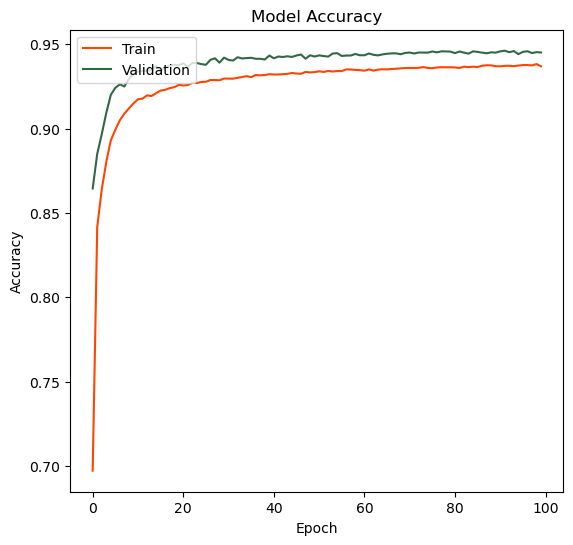

In [29]:
# Function for Plotting

# Plot accuracy versus epochs
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(100)
plt.plot(model_history.history['accuracy'],label='train', color='#FF4500')
plt.plot(model_history.history['val_accuracy'],label='test', color='#306844')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The plot visualizes the model's accuracy as it evolves throughout the training process across 100 epochs. The training accuracy (in red) shows a rapid improvement in the initial epochs, signifying a quick learning of patterns within the training dataset. The validation accuracy (in green) also increases and then plateaus, maintaining close proximity to the training accuracy without any significant divergence.

This behavior suggests that the model is generalizing well rather than overfitting, indicated by the validation accuracy tracking closely with the training accuracy. The plateau in accuracy for both training and validation sets suggests that the model has reached its learning capacity with the given architecture and data, as additional epochs do not lead to significant improvements in accuracy.


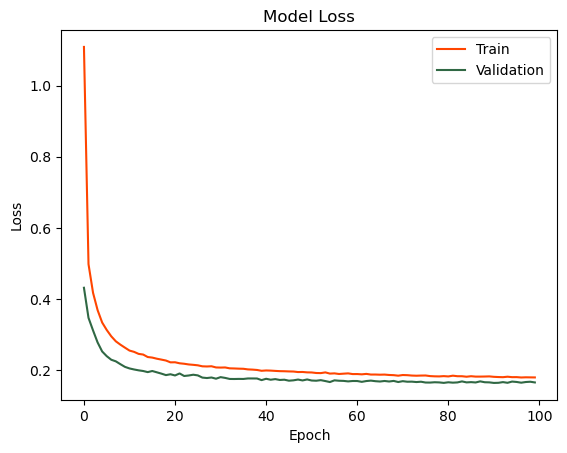

In [30]:
# Plot loss versus epochs
plt.plot(model_history.history['loss'],label='train', color='#FF4500')
plt.plot(model_history.history['val_loss'],label='test', color='#306844')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

The loss plot indicates the model's performance in terms of the categorical cross-entropy loss over 100 epochs. The training loss (in red) decreases sharply at the beginning and then steadily declines, demonstrating that the model is effectively learning from the training data. The validation loss (in green) follows a similar trend, decreasing rapidly at first and then plateauing, which suggests that the model is generalizing well to unseen data.

The convergence of the training and validation loss and the absence of a significant gap between them throughout training suggest that the model is not overfitting. It implies that the model's complexity is appropriate for the data and that it has learned the underlying patterns without memorizing the training data.

## Conclusion
In conclusion, the neural network model demonstrated strong performance on the TMNIST dataset, achieving an impressive accuracy of 93.86% on the test set. The learning curves for both accuracy and loss show that the model trained effectively, with validation metrics closely following the training metrics, suggesting good generalization. The model's architecture, consisting of convolutional, pooling, and dropout layers, was well-suited for the task, capturing the complex patterns in the image data without overfitting. Overall, the model's high accuracy and stable learning curves indicate it is well-optimized for classifying the diverse characters and symbols in the TMNIST dataset.


### References:
 - Spandanaparisi. (2023). Neural Network Classification. Kaggle. https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters
 - OpenAI. (2024). Personal communication with ChatGPT on neural network classification [Personal communication].

MIT License

Copyright (c) 2024 Ram

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.